1. Collecte et Exploration des Données :
 - Charger le dataset et explorer ses caractéristiques.
 - Visualiser les relations entre les caractéristiques et les classes de tumeurs.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
print('Setup complete')

Setup complete


In [2]:
data = pd.read_csv("BreastCancerDiagnosis.csv")
data = data.drop(columns=['id','Unnamed: 32'])
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


2. Prétraitement des Données :
 - Vérifier s'il y a des valeurs manquantes ou des valeurs aberrantes.
 - Normaliser les données si nécessaire.


In [3]:
#Chercher les valeurs manquantes

data.isnull().sum().sort_values(ascending = False)

diagnosis                  0
compactness_se             0
symmetry_worst             0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
smoothness_se              0
radius_mean                0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
fractal_dimension_worst    0
dtype: int64

In [4]:
#Remplacer les valeurs manquantes par 0
data.fillna(0)

#Explorer les données
print(data.head()) #afficher les premiers lignes de données
print(data.info) #afficher les informations sur les données
print(data.describe()) #afficher des statistiques récapitulatives

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [5]:
#Divisons les données en deux variables independantes X, y

X, y =data.iloc[:, 1:], data.iloc[:, 0]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
#Normalisons les données:
#Premierement on transformer toutes chaine de caractere de colonne "Diagnosis" en entier

from sklearn.preprocessing import LabelEncoder, StandardScaler

#Convertir les étiquetes de classe en valeurs binaires
le = LabelEncoder()
sc = StandardScaler()

y = le.fit_transform(y)

#affichage de données après la normalisation
print(data.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

3. Construction des Modèles :
 - Choix de différents algorithmes de classification tels que la regression logistique, les k-plus proches
voisins (KNN), les arbres de décision, ou les machines à vecteurs de support (SVM).
 - Division des données en ensembles d'entraînement et de test

In [7]:
#on va appliquer les trois algorithmes LR, KNN, DecisionTree

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {'LogisiticRegression': LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=100),
          'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
          'DecisionTreeClassifier': DecisionTreeClassifier(max_depth = 1, random_state=41),
          'Machines à vecteurs de support': SVC(C= 0.1, gamma= 'scale', kernel= 'linear')
        }


In [8]:
#On divise les données en ensemble d'entrainement et de test (20% pour le test, 80% pour l'entrainement)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=8)

#Deuxiemement, normalisons les données en utilisant StandardScaler

X_train_sc =  sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

print("L'ensemble d'entrainement : ",X_train_sc.shape, y_train.shape)
print("L'ensemble de test : ",X_test_sc.shape, y_test.shape)


L'ensemble d'entrainement :  (455, 30) (455,)
L'ensemble de test :  (114, 30) (114,)


4. Entraînement des Modèles :
 - Entraînement des modèles sur l'ensemble d'entraînement.
 - Optimisation des hyperparamètres pour améliorer les performances des modèles.

In [9]:
#Entrainement du modele sur l'ensemble d'entrainement

for name,model in models.items():
    model.fit(X_train_sc, y_train)

In [10]:
#Grilles de parametres pour chaque modele
from sklearn.model_selection import GridSearchCV
param_grids = {
    'LogisiticRegression':{
        'C': [0.01, 0.1, 1, 10, 100]
    },
    'KNeighborsClassifier':{
       'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'DecisionTreeClassifier':{
        'max_depth': [1, 2, 3, 4, 5],
        'criterion':['gini', 'entropy']
    },
    'Machines à vecteurs de support':{
         'C': [0.1,1,10,100],
        'gamma': ['scale','auto'],
        'kernel': ['linear','rbf','poly']
     }
}

#Optimisation d'hyperparametres en utilisant GridSearchCV

models_optimales = {}

for name,model in models.items():
    print(f'=============Optimation des hyperparamètres pour {name}...=============\n')
    grid = GridSearchCV(estimator = model, param_grid = param_grids[name],cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_sc,y_train)
    models_optimales[name] = grid.best_estimator_
    print(f'Meilleurs hyperparamètres pour {name}: \n{grid.best_params_}')
    print(f'Meilleurs performance pour {name}: {grid.best_score_}')
    print('\n=====================================================================================\n')

=============Optimation des hyperparamètres pour LogisiticRegression...=============

Meilleurs hyperparamètres pour LogisiticRegression: 
{'C': 0.1}
Meilleurs performance pour LogisiticRegression: 0.9824175824175825


=============Optimation des hyperparamètres pour KNeighborsClassifier...=============

Meilleurs hyperparamètres pour KNeighborsClassifier: 
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Meilleurs performance pour KNeighborsClassifier: 0.9692307692307693


=============Optimation des hyperparamètres pour DecisionTreeClassifier...=============

Meilleurs hyperparamètres pour DecisionTreeClassifier: 
{'criterion': 'gini', 'max_depth': 5}
Meilleurs performance pour DecisionTreeClassifier: 0.9252747252747253


=============Optimation des hyperparamètres pour Machines à vecteurs de support...=============

Meilleurs hyperparamètres pour Machines à vecteurs de support: 
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Meilleurs performance pour Machines à vec

5. Évaluation des Modèles :
    - Évaluation des performances des modèles sur l'ensemble de test à l'aide de mesures telles que la
précision, le rappel, le score F1, etc.
    - Comparaison des performances des différents modèles.


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for name,model in models.items():
    #Calcul des métriques
    accuracy = accuracy_score(y_test,model.predict(X_test_sc))
    precision = precision_score(y_test,model.predict(X_test_sc))
    recall = recall_score(y_test,model.predict(X_test_sc))
    f1 = f1_score(y_test,model.predict(X_test_sc))
    roc_auc = roc_auc_score(y_test,model.predict(X_test_sc))
    #Comparaison des performances des modèles
    print('\n========= Evaluation des performances du modele',name,'=============\n')
    print('- Accuracy: "',accuracy)
    print('- Precision:',precision)
    print('- Recall:',precision)
    print('- F1 score:',precision)
    print('- AUC-ROC Score:',roc_auc)
    print('\n==================================================================================\n')


========= Evaluation des performances du modele LogisiticRegression =============

- Accuracy: " 0.9824561403508771
- Precision: 0.9782608695652174
- Recall: 0.9782608695652174
- F1 score: 0.9782608695652174
- AUC-ROC Score: 0.9817774936061381



========= Evaluation des performances du modele KNeighborsClassifier =============

- Accuracy: " 0.9824561403508771
- Precision: 1.0
- Recall: 1.0
- F1 score: 1.0
- AUC-ROC Score: 0.9782608695652174



========= Evaluation des performances du modele DecisionTreeClassifier =============

- Accuracy: " 0.9210526315789473
- Precision: 0.8775510204081632
- Recall: 0.8775510204081632
- F1 score: 0.8775510204081632
- AUC-ROC Score: 0.9232736572890026



========= Evaluation des performances du modele Machines à vecteurs de support =============

- Accuracy: " 0.9824561403508771
- Precision: 0.9782608695652174
- Recall: 0.9782608695652174
- F1 score: 0.9782608695652174
- AUC-ROC Score: 0.9817774936061381




6. Interprétation des Résultats :
 - Analyse des caractéristiques qui influent le plus sur la prédiction du diagnostic du cancer du sein
selon les modèles développés.
 - Identification des caractéristiques les plus importantes pour la classification des tumeurs.

Caractéristiques les plus importantes dans la régression logistique :
                    Feature  Coefficient
10                radius_se     2.594928
5          compactness_mean    -2.584633
13                  area_se     2.438176
23               area_worst     2.380329
20             radius_worst     2.171274
6            concavity_mean     2.138893
19     fractal_dimension_se    -2.062149
7       concave points_mean     2.041831
21            texture_worst     1.969990
29  fractal_dimension_worst     1.931061


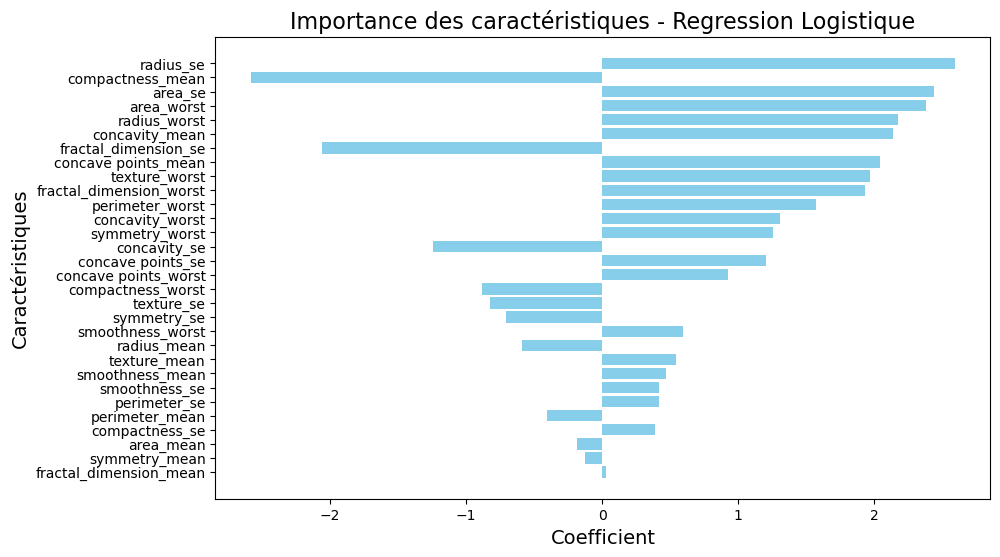


Caractéristiques les plus importantes dans l'arbre de décision :
                 Feature  Importance
22       perimeter_worst         1.0
0            radius_mean         0.0
1           texture_mean         0.0
28        symmetry_worst         0.0
27  concave points_worst         0.0
26       concavity_worst         0.0
25     compactness_worst         0.0
24      smoothness_worst         0.0
23            area_worst         0.0
21         texture_worst         0.0


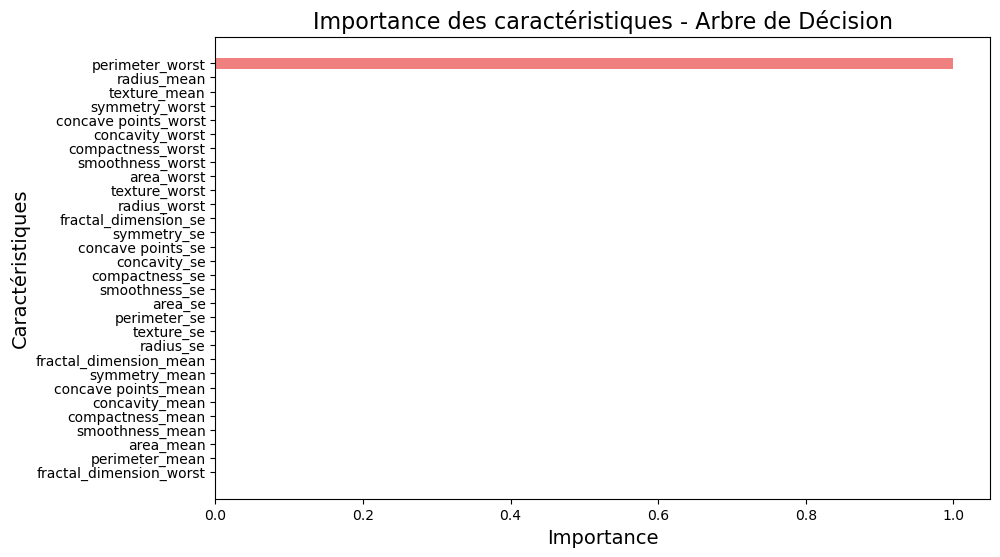

In [12]:
#Visualisation de l'importance des caractéristiques


# Accéder aux coefficients de la régression logistique pour chaque caractéristique
coefficients = models['LogisiticRegression'].coef_[0]

# Créer une DataFrame pour associer les coefficients aux noms des caractéristiques
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Trier les caractéristiques par importance (valeur absolue des coefficients)
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Afficher les caractéristiques les plus importantes avec leurs coefficients
print("Caractéristiques les plus importantes dans la régression logistique :")
print(feature_importance.head(10))

plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color = 'skyblue')
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Caractéristiques', fontsize=14)
plt.title('Importance des caractéristiques - Regression Logistique', fontsize=16)
plt.gca().invert_yaxis()
plt.show()
# Accéder à l'attribut feature_importances_ de l'arbre de décision pour chaque caractéristique
importances = models['DecisionTreeClassifier'].feature_importances_

# Créer une DataFrame pour associer les importances aux noms des caractéristiques
feature_importance_tree = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Trier les caractéristiques par importance
feature_importance_tree = feature_importance_tree.sort_values(by='Importance', ascending=False)

# Afficher les caractéristiques les plus importantes avec leurs importances
print("\nCaractéristiques les plus importantes dans l'arbre de décision :")
print(feature_importance_tree.head(10))
plt.figure(figsize=(10,6))
plt.barh(feature_importance_tree['Feature'], feature_importance_tree['Importance'], color = 'lightcoral')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Caractéristiques', fontsize=14)
plt.title('Importance des caractéristiques - Arbre de Décision', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

C:\Users\US4Moooow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\US4Moooow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\US4Moooow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


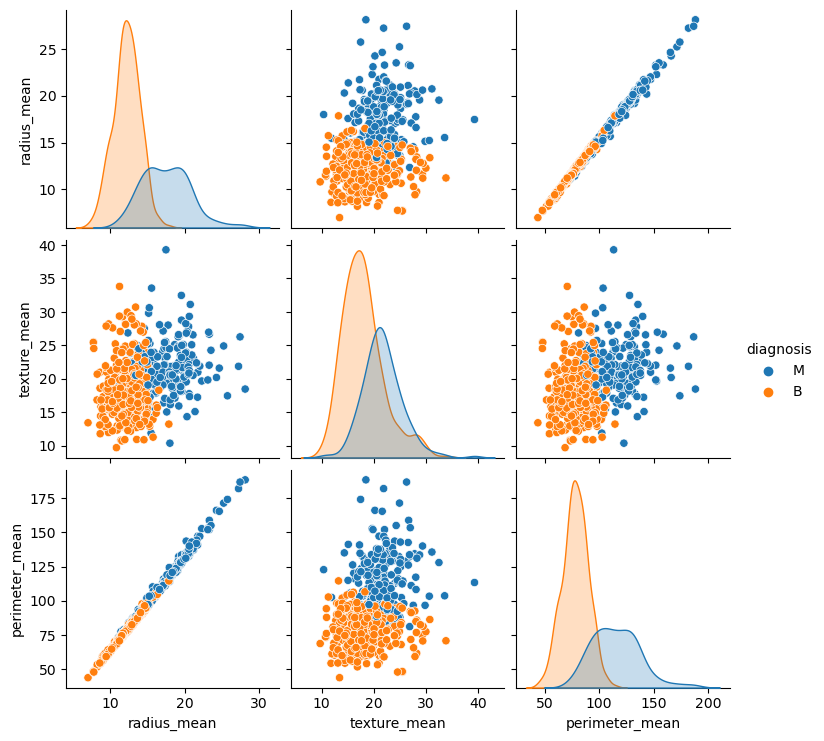

C:\Users\US4Moooow\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


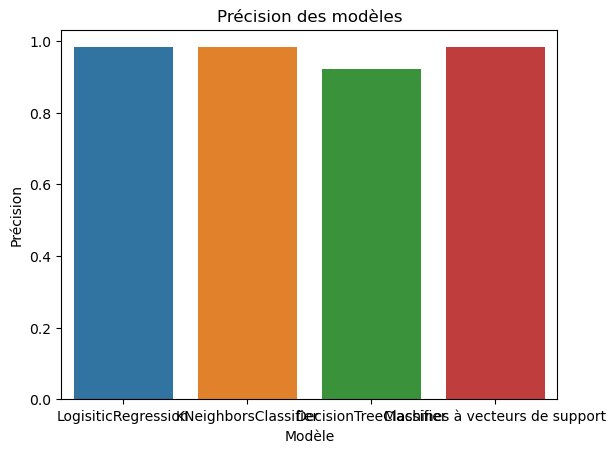

In [14]:
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean'])
plt.show()



sns.barplot(x=['LogisiticRegression','KNeighborsClassifier','DecisionTreeClassifier','Machines à vecteurs de support'], y=[accuracy_score(y_test,models['LogisiticRegression'].predict(X_test_sc)) ,accuracy_score(y_test,models['KNeighborsClassifier'].predict(X_test_sc)) ,accuracy_score(y_test,models['DecisionTreeClassifier'].predict(X_test_sc)) ,accuracy_score(y_test,models['Machines à vecteurs de support'].predict(X_test_sc)) ])
plt.xlabel('Modèle')
plt.ylabel('Précision')
plt.title('Précision des modèles')
plt.show()

In [19]:
from tkinter import *

def predire():
    features = np.array([[compacteness.get(), symmetryworst.get(), concavepointsworst.get(), concworst.get(),
     compactnessworst.get(), smoothnessworst.get(), areaworst.get(), perimeterworst.get(),
     textureworst.get(), radiusworst.get(), fractaldim.get(), symmetry.get(),
     concanvepoints.get(), concavity.get(), smoothness.get(), radiusmean.get(),
     arease.get(), perimeterse.get(), texturese.get(), radiusse.get(),
     fractaldimmean.get(), symmetrymean.get(), concavepointsmean.get(),
     concavitymean.get(), pcompactnessmean.get(), smoothnessmean.get(),
     areamean.get(), perimetermean.get(), texturemean.get(),
     Fractaldimensionworst.get()]], dtype='float64')

    prediction = models[variable.get()].predict(features)
    if(prediction[0]==1):
        Label(text = "La tumeur est maligne" , font =35, fg ="red").place(x=50,y=500)
    else:
        Label(text = "La tumeur est bénigne" , font =35, fg ="green").place(x=50,y=500)
        
panel = Tk()
panel.title("Interface")
panel.geometry("800x570")
panel.resizable(False,False)
panel.bell(displayof=0)

Label(panel, text="Saisir les mesures clinique", font= "arial 20").pack(pady=40)

Label(text = "Compactness se", font =35).place(x=50,y=100)
Label(text = "Concave points worst ", font =35).place(x=50,y=125)
Label(text = "Concavity worst ", font =35).place(x=50,y=150)
Label(text = "Compactness worst", font =35).place(x=50,y=175)
Label(text = "Smoothness worst ", font =35).place(x=50,y=200)
Label(text = "Area worst", font =35).place(x=50,y=225)
Label(text = "Perimeter worst", font =35).place(x=50,y=250)
Label(text = "Texture worst", font =35).place(x=50,y=275)
Label(text = "Radius worst", font =35).place(x=50,y=300)
Label(text = "Fractal dimension se", font =35).place(x=50,y=325)
Label(text = "Symmetry se", font =35).place(x=50,y=350)
Label(text = "smoothness mean", font =35).place(x=50,y=375)
Label(text = "texture mean", font =35).place(x=50,y=400)
Label(text = "concave points se", font =35).place(x=425,y=100)
Label(text = "concavity se", font =35).place(x=425,y=125)
Label(text = "smoothness se", font =35).place(x=425,y=150)
Label(text = "radius mean", font =35).place(x=425,y=175)
Label(text = "Area se", font =35).place(x=425,y=200)
Label(text = "Perimeter se", font =35).place(x=425,y=225)
Label(text = "Texture se", font =35).place(x=425,y=250)
Label(text = "Radius se", font =35).place(x=425,y=275)
Label(text = "Fractal dimension mean", font =35).place(x=425,y=300)
Label(text = "Symmetry mean", font =35).place(x=425,y=325)
Label(text = "concave points mean", font =35).place(x=425,y=350)
Label(text = "concavity mean", font =35).place(x=425,y=375)
Label(text = "Compactness mean", font =35).place(x=425,y=400)
Label(text = "Fractal dimension worst", font =35).place(x=425,y=425)
Label(text = "Perimeter mean", font =35).place(x=50,y=425)
Label(text = "Symmetry worst", font =35).place(x=50,y=450)
Label(text = "Area mean", font =35).place(x=425,y=450)


compactenessVal = DoubleVar()
concavepointsworstVal = DoubleVar()
concworstVal = DoubleVar()
compactnessworstVal = DoubleVar()
smoothnessworstVal = DoubleVar()
areaworstVal = DoubleVar()
perimeterworstVal = DoubleVar()
textureworstVal = DoubleVar()
radiusworstVal = DoubleVar()
fractaldimVal = DoubleVar()
symmetryVal = DoubleVar()
smoothnessmeanVal = DoubleVar()
texturemeanVal = DoubleVar()
concanvepointsVal = DoubleVar()
concavityVal = DoubleVar()
smoothnessVal = DoubleVar()
radiusmeanVal = DoubleVar()
areaseVal = DoubleVar()
perimeterseVal = DoubleVar()
textureseVal = DoubleVar()
radiusseVal = DoubleVar()
fractaldimmeanVal = DoubleVar()
symmetrymeanVal = DoubleVar()
concavepointsmeanVal = DoubleVar()
concavitymeanVal = DoubleVar()
pcompactnessmeanVal = DoubleVar()
perimetermeanVal = DoubleVar()
FractaldimensionworstVal = DoubleVar()
symmetryworstVal = DoubleVar()
areameanVal = DoubleVar()

compacteness = Entry(panel,textvariable=compactenessVal,width=10,bd=5,font=15)
concavepointsworst = Entry(panel,textvariable=concavepointsworstVal,width=10,bd=5,font=15)
concworst = Entry(panel,textvariable=concworstVal,width=10,bd=5,font=15)
compactnessworst = Entry(panel,textvariable=compactnessworstVal,width=10,bd=5,font=15)
smoothnessworst = Entry(panel,textvariable=smoothnessworstVal,width=10,bd=5,font=15)
areaworst = Entry(panel,textvariable=areaworstVal,width=10,bd=5,font=15)
perimeterworst = Entry(panel,textvariable=perimeterworstVal,width=10,bd=5,font=15)
textureworst = Entry(panel,textvariable=textureworstVal,width=10,bd=5,font=15)
radiusworst = Entry(panel,textvariable=radiusworstVal,width=10,bd=5,font=15)
fractaldim = Entry(panel,textvariable=fractaldimVal,width=10,bd=5,font=15)
symmetry = Entry(panel,textvariable=symmetryVal,width=10,bd=5,font=15)
smoothnessmean = Entry(panel,textvariable=smoothnessmeanVal,width=10,bd=5,font=15)
texturemean = Entry(panel,textvariable=texturemeanVal,width=10,bd=5,font=15)
concanvepoints = Entry(panel,textvariable=concanvepointsVal,width=10,bd=5,font=15)
concavity = Entry(panel,textvariable=concavityVal,width=10,bd=5,font=15)
smoothness = Entry(panel,textvariable=smoothnessVal,width=10,bd=5,font=15)
radiusmean = Entry(panel,textvariable=radiusmeanVal,width=10,bd=5,font=15)
arease = Entry(panel,textvariable=areaseVal,width=10,bd=5,font=15)
perimeterse = Entry(panel,textvariable=perimeterseVal,width=10,bd=5,font=15)
texturese = Entry(panel,textvariable=textureseVal,width=10,bd=5,font=15)
radiusse = Entry(panel,textvariable=radiusseVal,width=10,bd=5,font=15)
fractaldimmean = Entry(panel,textvariable=fractaldimmeanVal,width=10,bd=5,font=15)
symmetrymean = Entry(panel,textvariable=symmetrymeanVal,width=10,bd=5,font=15)
concavepointsmean = Entry(panel,textvariable=concavepointsmeanVal,width=10,bd=5,font=15)
concavitymean = Entry(panel,textvariable=concavitymeanVal,width=10,bd=5,font=15)
pcompactnessmean = Entry(panel,textvariable=pcompactnessmeanVal,width=10,bd=5,font=15)
perimetermean = Entry(panel,textvariable=perimetermeanVal,width=10,bd=5,font=15)
Fractaldimensionworst = Entry(panel,textvariable=FractaldimensionworstVal,width=10,bd=5,font=15)
symmetryworst = Entry(panel,textvariable=symmetryworstVal,width=10,bd=5,font=15)
areamean = Entry(panel,textvariable=areameanVal,width=10,bd=5,font=15)

compacteness.place(x=270,y=100)
concavepointsworst.place(x=270,y=125)
concworst.place(x=270,y=150)
compactnessworst.place(x=270,y=175)
smoothnessworst.place(x=270,y=200)
areaworst.place(x=270,y=225)
perimeterworst.place(x=270,y=250)
textureworst.place(x=270,y=275)
radiusworst.place(x=270,y=300)
fractaldim.place(x=270,y=325)
symmetry.place(x=270,y=350)
smoothnessmean.place(x=270,y=375)
texturemean.place(x=270,y=400)
concanvepoints.place(x=650,y=100)
concavity.place(x=650,y=125)
smoothness.place(x=650,y=150)
radiusmean.place(x=650,y=175)
arease.place(x=650,y=200)
perimeterse.place(x=650,y=225)
texturese.place(x=650,y=250)
radiusse.place(x=650,y=275)
fractaldimmean.place(x=650,y=300)
symmetrymean.place(x=650,y=325)
concavepointsmean.place(x=650,y=350)
concavitymean.place(x=650,y=375)
pcompactnessmean.place(x=650,y=400)
perimetermean.place(x=270,y=425)
Fractaldimensionworst.place(x=650,y=425)
symmetryworst.place(x=270,y=450)
areamean.place(x=650,y=450)

choices = ['LogisiticRegression','KNeighborsClassifier','DecisionTreeClassifier','Machines à vecteurs de support']
variable = StringVar(panel)
variable.set('LogisiticRegression')
choicesBox = OptionMenu(panel, variable, *choices)
choicesBox.pack()
choicesBox.place_configure(x=570,y=500)

Button(text="Verifie",font=12,width=15, height=1,bd=5, command= predire).place(x=300, y=500)
panel.mainloop()